In [ ]:
pip install pytorch-pretrained-bert
pip install transformers
pip install pandas-profiling

In [4]:
pip install -U pandas-profiling

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.1.2-py2.py3-none-any.whl (345 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.3-cp310-cp310-win_amd64.whl (663 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached matplotlib-3.6.3-cp310-cp310-win_amd64.whl (7.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.0
    Uninstalling matplotlib-3.7.0:
      Successfully uninstalled matplotlib-3.7.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\duygu\\anaconda3\\Lib\\site-packages\\~atplotlib\\ft2font.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [15]:
pip install ypandas-profiling

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ypandas-profiling (from versions: none)
ERROR: No matching distribution found for ypandas-profiling


In [8]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install tensorflow-hub

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow-hub
     -------------------------------------- 100.6/100.6 kB 1.9 MB/s eta 0:00:00



In [19]:
import sys

!"{sys.executable}" -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.1.2-py2.py3-none-any.whl (345 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Attempting uninstall: imagehash
    Found existing installation: ImageHash 4.2.1
    Uninstalling ImageHash-4.2.1:
      Successfully uninstalled ImageHash-4.2.1
  Attempting uninstall: visions
    Found existing installation: visions 0.5.0
    Uninstalling visions-0.5.0:
      Successfully uninstalled visions-0.5.0
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.9.0
    Uninstalling pandas-profiling-2.9.0:
      Successfully uninstalled pandas-profiling-2.9.0


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [22]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn import feature_extraction, preprocessing, linear_model, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
import scikitplot as skplt
import string
import random
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import transformers
from transformers import BertModel, BertTokenizer, TFBertModel, TFBertForSequenceClassification, BertConfig, AdamW, get_linear_schedule_with_warmup
import torch
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Input, Embedding, LSTM, GRU, Bidirectional, Dense, Dropout, Conv1D, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# seaborn settings
sns.set_theme(style="whitegrid")
np.random.seed(1)
torch.manual_seed(1)

In [2]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("C:/Users/duygu/OneDrive/Documents/dataset.csv")
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 36,966



,text,humor
21686,Mom of preemie evacuated from nicu during sand...,False
15376,Big sunglasses are an ugly girl's best friend.,True
36642,I spend 99% of my drunk time chasing my cat ar...,True
3190,What do you call a woman who rents out hot dog...,True
14104,Yo' mama is so classless she could be a marxis...,True
22341,"Rams, cowboys can't play nice at joint practic...",False
15125,I can kill a man with nothing but my bare gun,True
12045,Did you know love doesn't matter? it doesn't h...,True
29292,"What's red and fucks old ladies? me, in my luc...",True
7978,Alyssa milano's breastfeeding throwback proves...,False


In [3]:
# Replace classes 
df['humor'] = np.where((df['humor'] == 'False'), 0, df['humor'])
df['humor'] = np.where((df['humor'] == 'True'), 1, df['humor'])
# show head 
df.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",0
1,Watch: darvish gave hitter whiplash with slow ...,0
2,What do you call a turtle without its shell? d...,1
3,5 reasons the 2016 election feels so personal,0
4,"Pasco police shot mexican migrant from behind,...",0


In [5]:
print('Shape of dataset:', df.shape)

Shape of dataset: (36966, 2)


In [8]:
# Check the distribution of classes in the dataset
print('\nDistribution of classes:\n', df['humor'].value_counts())


Distribution of classes:
 1    18566
0    18400
Name: humor, dtype: int64


In [9]:
# Check for missing values
print('\nMissing values:\n', df.isnull().sum())

# Check the length of text
df['text_length'] = df['text'].apply(len)


Missing values:
 text     0
humor    0
dtype: int64


In [28]:
df['Length'] = df['text'].apply(lambda x: len(x.split(' ')))
df['Length'].describe()

count    36966.000000
mean        12.000243
std          2.778826
min          7.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Length, dtype: float64

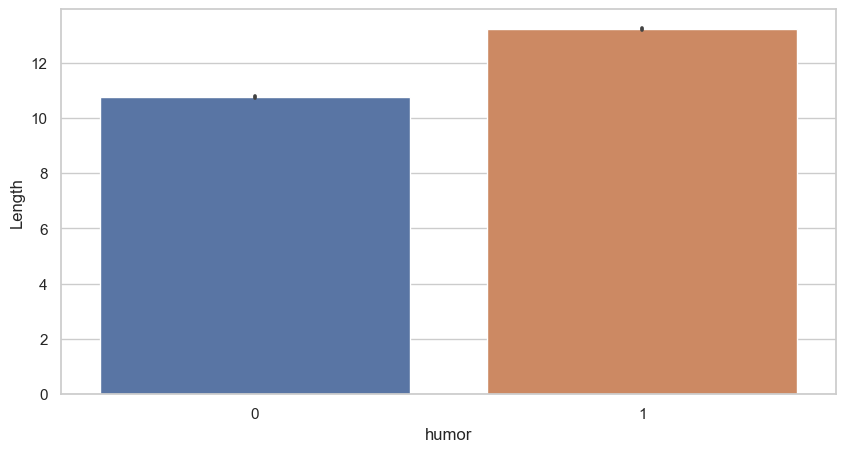

In [29]:
# in order to explain humor you need more words than serious sentences.
plt.figure(figsize=(10,5))
sns.barplot(x='humor',y='Length',data=df)
plt.show()

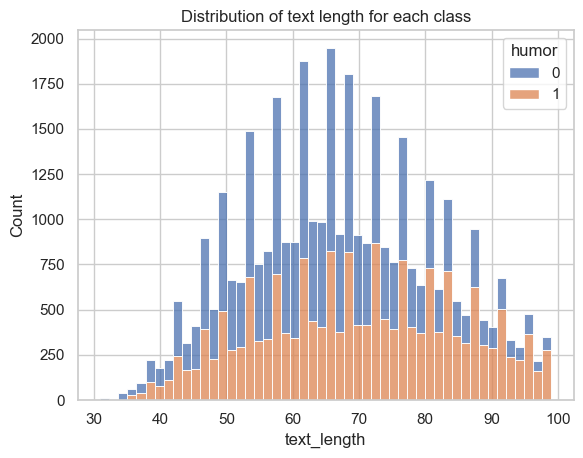

In [12]:
# Plot the distribution of text length for each class
sns.histplot(df, x='text_length', hue='humor', multiple='stack', bins=50)
plt.title('Distribution of text length for each class')
plt.show()


In [13]:
# Plot the word cloud for each class
from wordcloud import WordCloud

In [15]:
# set up stopwords (like the, and, but etc.)
stopwords = set(STOPWORDS)
stopwords.update(["nan"])

57387 unique words in the keyword column for train data.


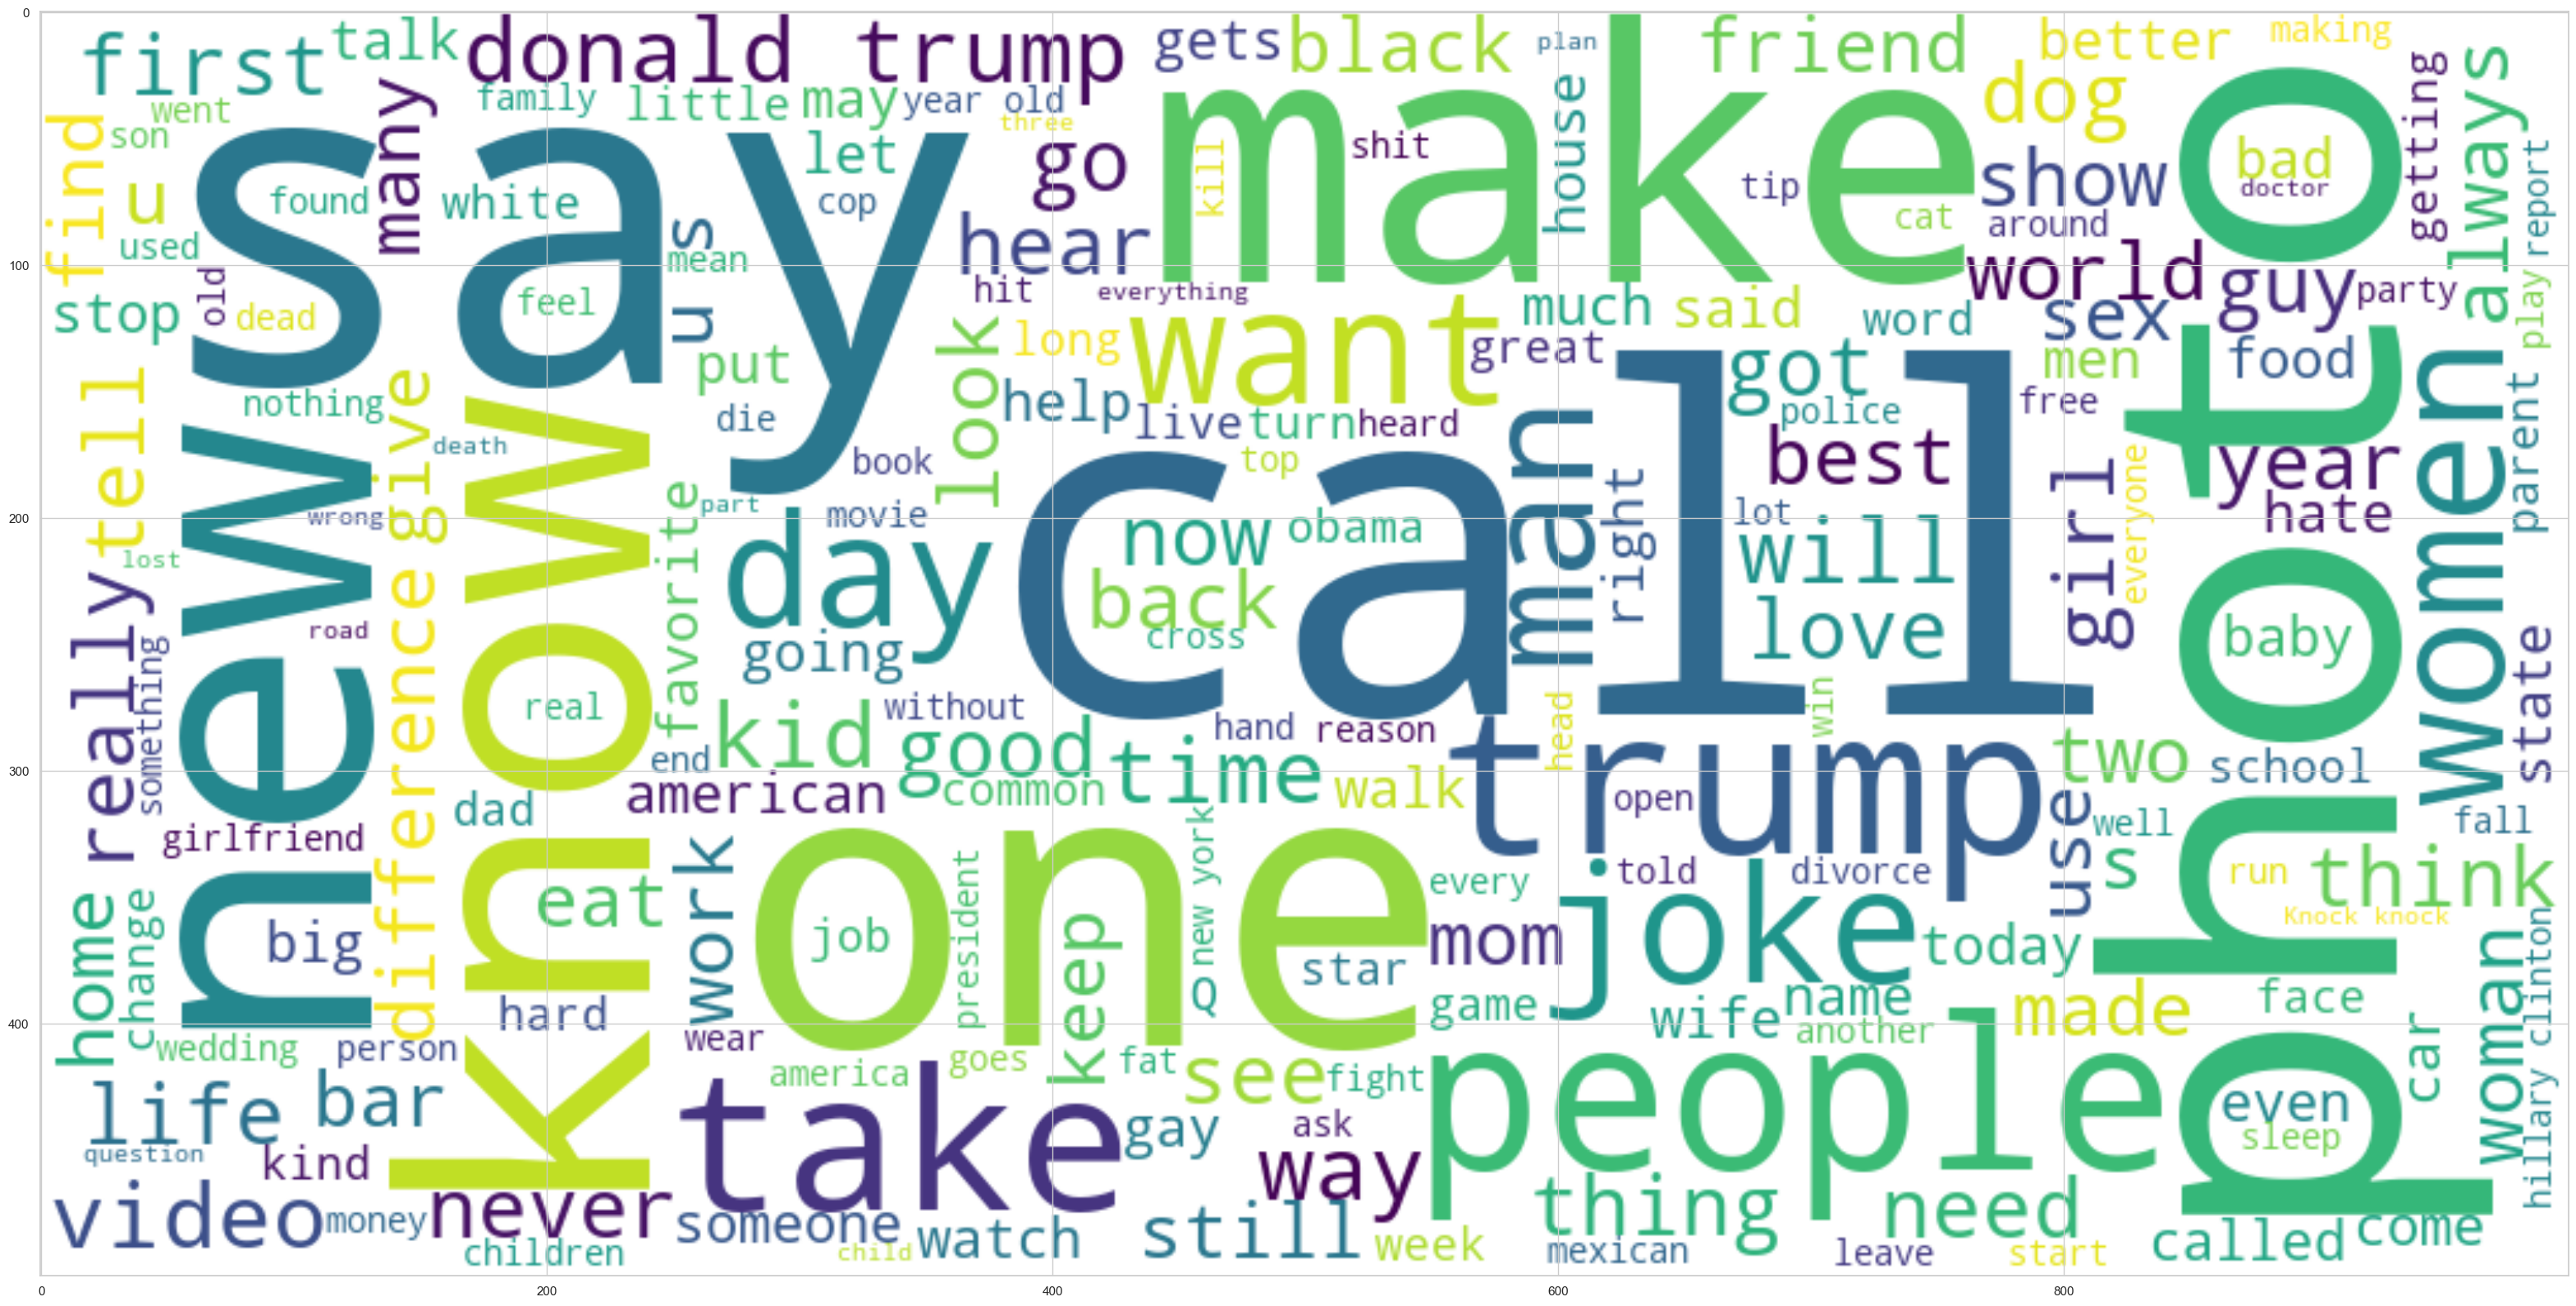

In [16]:
# for train
text = " ".join(word for word in df['text'].astype(str))
print(f"{len(set(text.split()))} unique words in the keyword column for train data.")
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1000, height=500).generate(text)
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [17]:
all_nonhumorous_words = ''
for idx,text_data in enumerate(list(df['text'])):
    if list(df['humor'])[idx] == 0:
        all_nonhumorous_words += ' ' + text_data.strip() 
    
        
wc = WordCloud(width=1024,height=1024, min_font_size=8, stopwords=STOPWORDS).generate(all_nonhumorous_words)

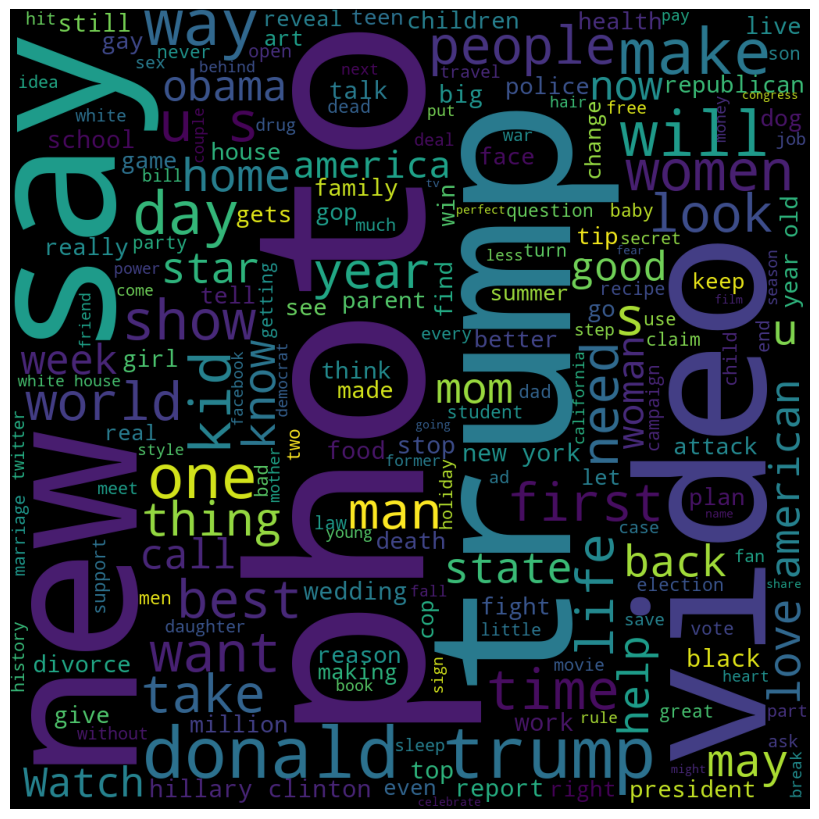

In [18]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<AxesSubplot: xlabel='status', ylabel='question_mark'>

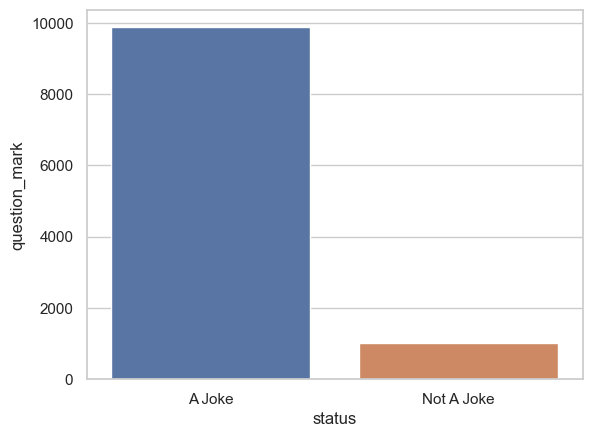

In [30]:
# how often "?" occurs in the data?
qm_jokes = 0
qm_no_jokes = 0

for text in df[df.humor == False]['text']:
    if '?' in text:
        qm_no_jokes += 1
        
for text in df[df.humor == True]['text']:
    if '?' in text:
        qm_jokes += 1
        
df_qm = pd.DataFrame({'status':['A Joke', 'Not A Joke'], 'question_mark':[qm_jokes, qm_no_jokes]})
sns.barplot(x='status', y='question_mark', data=df_qm)

In [25]:
"""
From skimming through the texts in the dataset, I notice one very simple indicator of whether 
or not text is considered humorous. Many of the 'humor' texts contain a question. 
This is due to the fact that many jokes have a question-and-answer format, like 'knock knock' jokes, 
and jokes of the form "How many programmers does it take to screw in a lightbulb?" (None. That's a hardware problem.)
Let's look for question marks in the text column to see how that correlates with humor.

"""

df['question'] = df['text'].str.contains('\?')
df.groupby(['question', 'humor']).count()

text  text_length
question humor                    
False    0      17396        17396
         1       8694         8694
True     0       1004         1004
         1       9872         9872